# Radon Sign Detection - Complete Analysis

Testing all approaches on **image 1.bmp** to detect ~53 radon signs.

Each approach has 3 cells:
1. Count circles and detect white dots
2. Visualize with circles drawn + table with positions and diameters
3. Apply filter and re-detect

Image shape: (960, 1280)
Target: ~53 radon signs



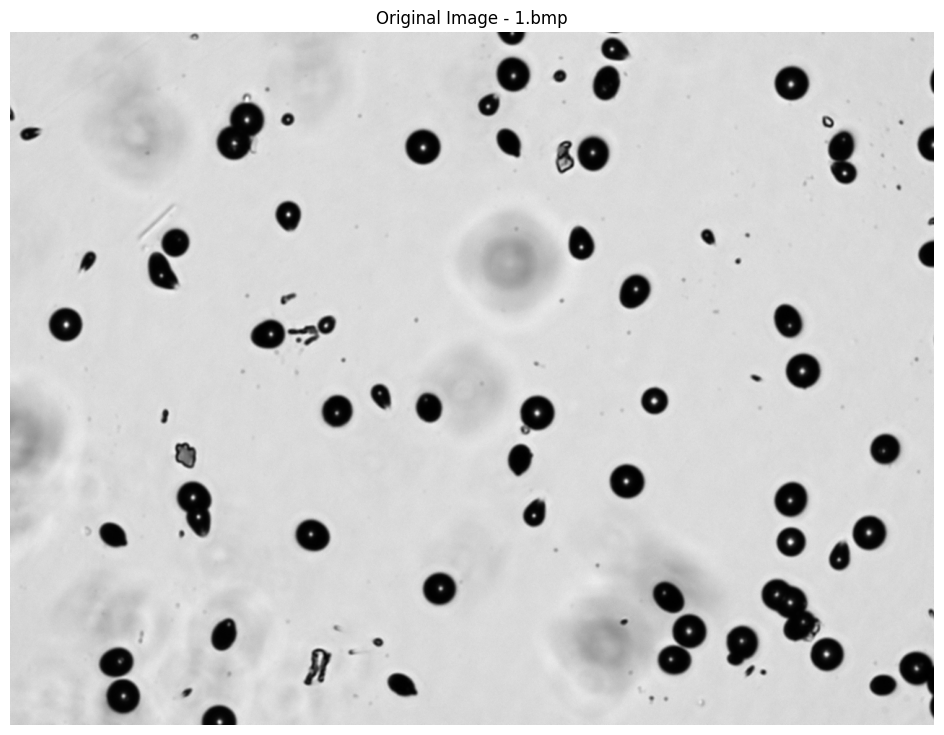

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from skimage.feature import blob_dog, blob_log, blob_doh
import cv2
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load image
image = cv2.imread('images/1.bmp', cv2.IMREAD_GRAYSCALE)
print(f'Image shape: {image.shape}')
print('Target: ~53 radon signs\n')

plt.figure(figsize=(12, 9))
plt.imshow(image, cmap='gray')
plt.title('Original Image - 1.bmp')
plt.axis('off')
plt.show()

---
## Approach 1: LoG (Laplacian of Gaussian)

**Fixed Parameters:** min_sigma=10, max_sigma=18, threshold=0.16

In [2]:
# Cell 1: Count circles and detect dots inside
blobs_log = blob_log(image, min_sigma=10, max_sigma=18, num_sigma=10, threshold=0.16)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

circles_with_dots_log = 0
for blob in blobs_log:
    y, x, r = int(blob[0]), int(blob[1]), blob[2]
    center = image[max(0,y-3):min(image.shape[0],y+3), max(0,x-3):min(image.shape[1],x+3)]
    if center.size > 0 and np.max(center) > 200:
        circles_with_dots_log += 1

print(f'Approach 1 - LoG:')
print(f'Total radon signs detected: {len(blobs_log)}')
print(f'Radon signs with white dots: {circles_with_dots_log}')

Approach 1 - LoG:
Total radon signs detected: 51
Radon signs with white dots: 51


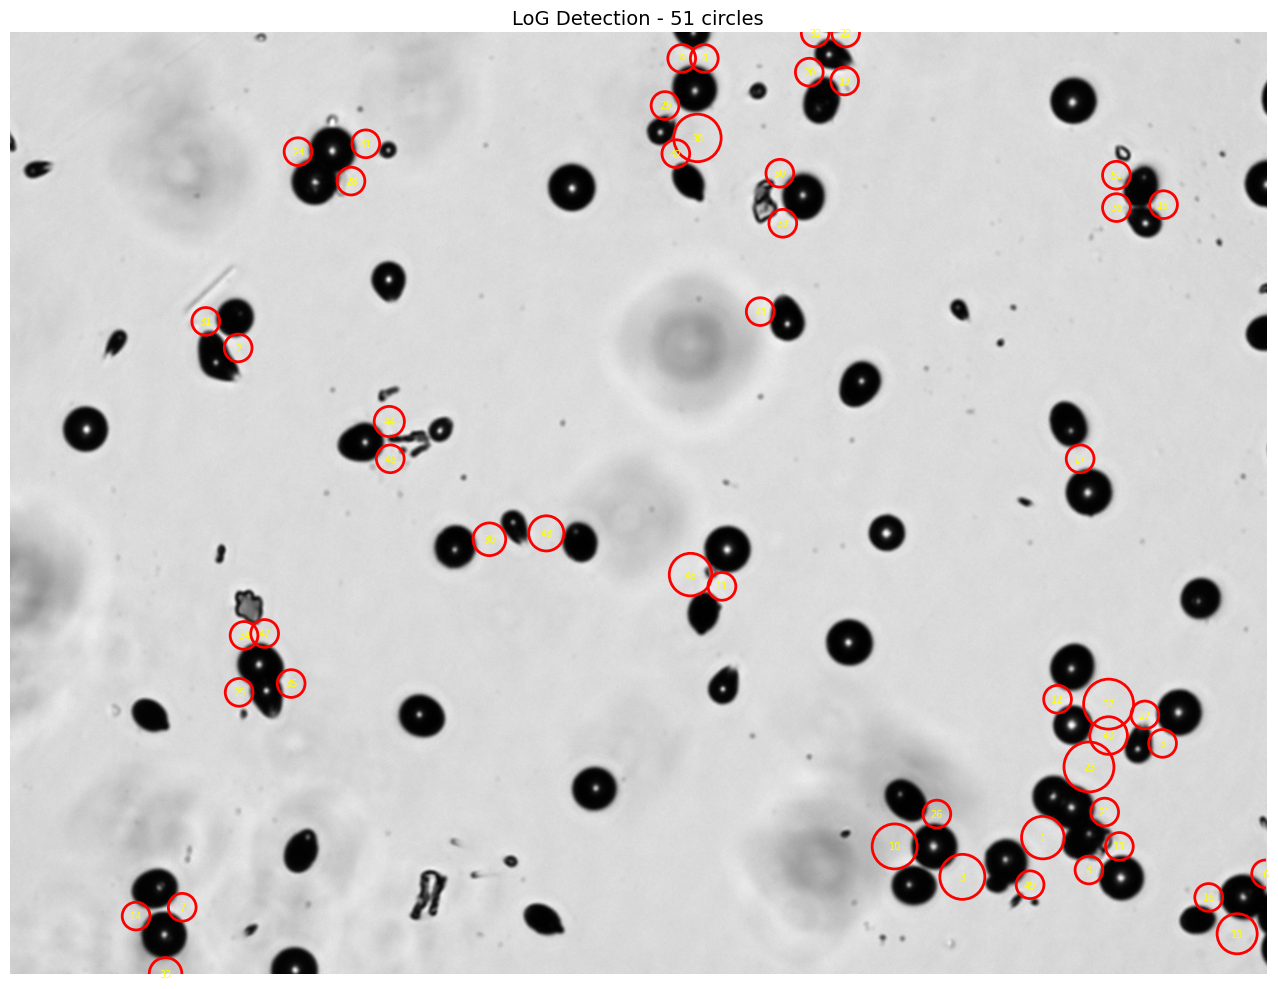


Detected Circles Details:
 ID    X   Y  Diameter  Radius  Has_Dot
  1 1052 820        43      21     True
  2  232 321        28      14     True
  3  970 860        45      22     True
  4 1099 853        28      14     True
  5 1174 724        28      14     True
  6 1279 857        28      14     True
  7  175 891        28      14     True
  8  707  26        28      14     True
  9  684  26        28      14     True
 10  901 829        45      22     True
 11  725 564        28      14     True
 12 1067 679        28      14     True
 13 1250 918        40      20     True
 14  128 900        28      14     True
 15 1175 175        28      14     True
 16 1221 881        28      14     True
 17 1090 434        28      14     True
 18 1130 829        28      14     True
 19  850  49        28      14     True
 20  814  40        28      14     True
 21 1115 794        28      14     True
 22  851   0        28      14     True
 23 1099 748        50      25     True
 24  293 121 

In [3]:
# Cell 2: Visualize detected circles and create table
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.imshow(image, cmap='gray')

circle_data_log = []
for idx, blob in enumerate(blobs_log):
    y, x, r = blob
    circle = Circle((x, y), r, color='red', fill=False, linewidth=2)
    ax.add_patch(circle)
    ax.text(x, y, str(idx+1), color='yellow', fontsize=7, ha='center', va='center')
    
    center = image[max(0,int(y)-3):min(image.shape[0],int(y)+3), max(0,int(x)-3):min(image.shape[1],int(x)+3)]
    has_dot = center.size > 0 and np.max(center) > 200
    
    circle_data_log.append({
        'ID': idx+1,
        'X': int(x),
        'Y': int(y),
        'Diameter': int(2*r),
        'Radius': int(r),
        'Has_Dot': has_dot
    })

ax.set_title(f'LoG Detection - {len(blobs_log)} circles', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

df_log = pd.DataFrame(circle_data_log)
print('\nDetected Circles Details:')
print(df_log.to_string(index=False))

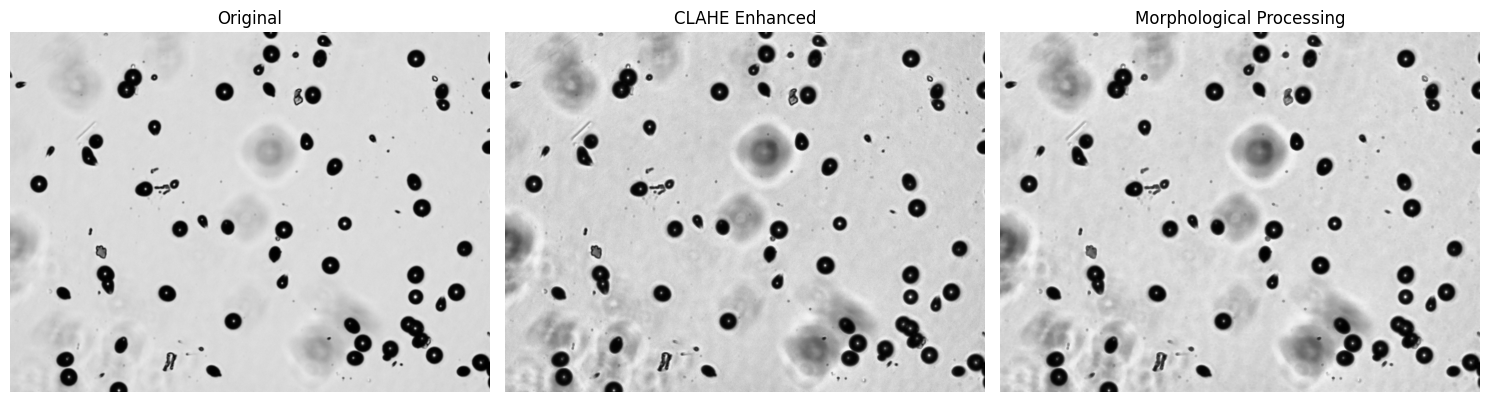

After enhancement: 55 circles detected


In [4]:
# Cell 3: Apply filter and re-detect
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_enhanced = clahe.apply(image)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
img_morph = cv2.morphologyEx(img_enhanced, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(132)
plt.imshow(img_enhanced, cmap='gray')
plt.title('CLAHE Enhanced')
plt.axis('off')
plt.subplot(133)
plt.imshow(img_morph, cmap='gray')
plt.title('Morphological Processing')
plt.axis('off')
plt.tight_layout()
plt.show()

blobs_log_enh = blob_log(img_morph, min_sigma=10, max_sigma=18, num_sigma=10, threshold=0.16)
blobs_log_enh[:, 2] = blobs_log_enh[:, 2] * np.sqrt(2)
print(f'After enhancement: {len(blobs_log_enh)} circles detected')

---
## Approach 2: DoG (Difference of Gaussian)

**Fixed Parameters:** min_sigma=9, max_sigma=19, threshold=0.12

In [5]:
# Cell 1: Count circles and detect dots inside
blobs_dog = blob_dog(image, min_sigma=9, max_sigma=19, threshold=0.12)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

circles_with_dots_dog = 0
for blob in blobs_dog:
    y, x, r = int(blob[0]), int(blob[1]), blob[2]
    center = image[max(0,y-3):min(image.shape[0],y+3), max(0,x-3):min(image.shape[1],x+3)]
    if center.size > 0 and np.max(center) > 200:
        circles_with_dots_dog += 1

print(f'Approach 2 - DoG:')
print(f'Total radon signs detected: {len(blobs_dog)}')
print(f'Radon signs with white dots: {circles_with_dots_dog}')

Approach 2 - DoG:
Total radon signs detected: 56
Radon signs with white dots: 56


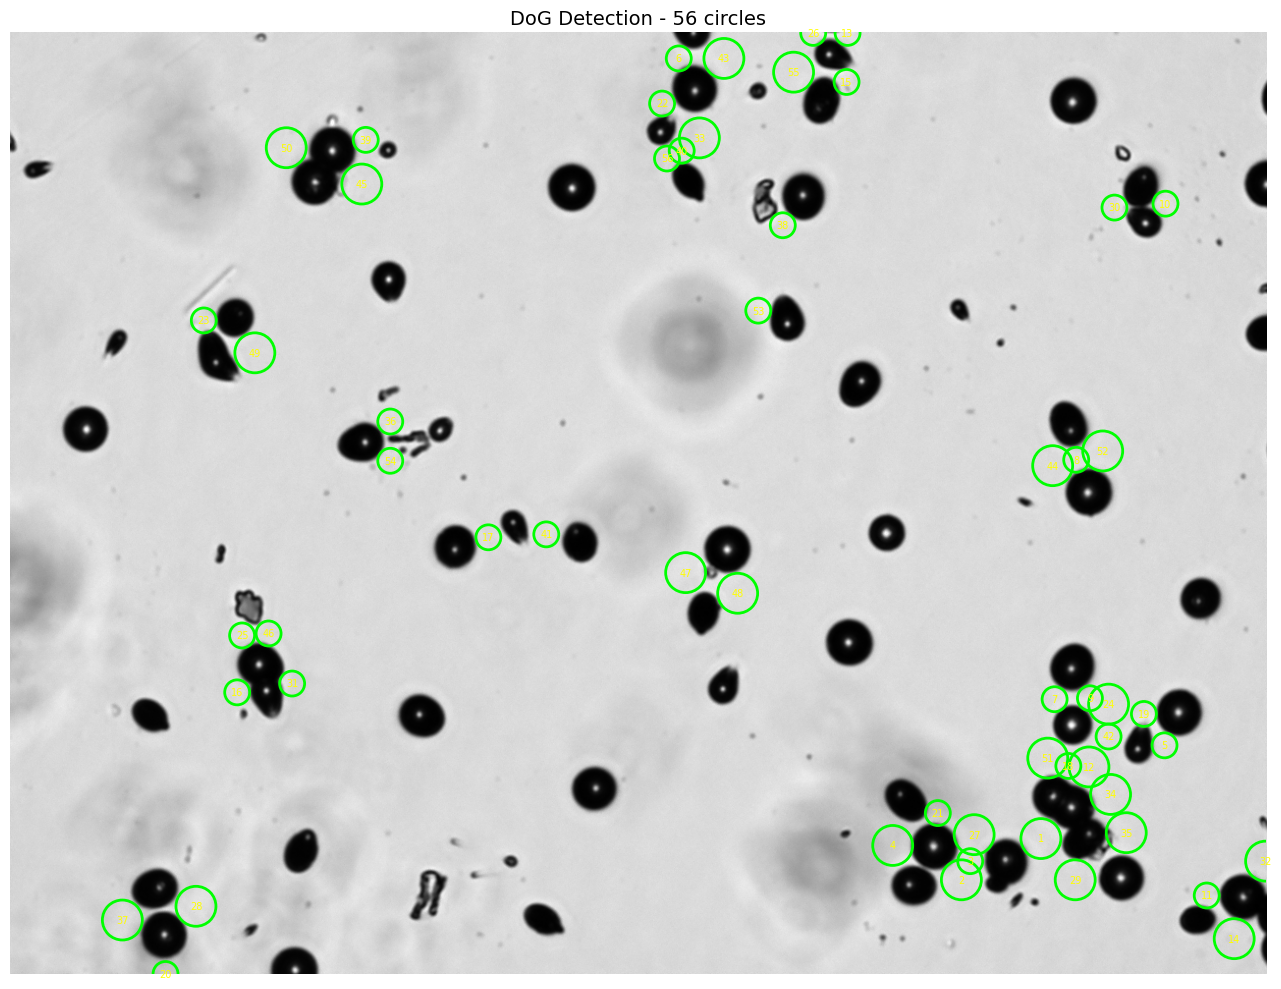


Detected Circles Details:
 ID    X   Y  Diameter  Radius  Has_Dot
  1 1050 821        40      20     True
  2  969 863        40      20     True
  3  978 844        25      12     True
  4  899 828        40      20     True
  5 1176 726        25      12     True
  6  681  26        25      12     True
  7 1064 679        25      12     True
  8 1086 435        25      12     True
  9 1100 678        25      12     True
 10 1177 174        25      12     True
 11 1219 879        25      12     True
 12 1099 748        40      20     True
 13  853   0        25      12     True
 14 1247 923        40      20     True
 15  852  50        25      12     True
 16  231 672        25      12     True
 17  487 514        25      12     True
 18 1078 747        25      12     True
 19 1155 694        25      12     True
 20  158 959        25      12     True
 21  945 795        25      12     True
 22  664  72        25      12     True
 23  197 293        25      12     True
 24 1119 684 

In [6]:
# Cell 2: Visualize detected circles and create table
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.imshow(image, cmap='gray')

circle_data_dog = []
for idx, blob in enumerate(blobs_dog):
    y, x, r = blob
    circle = Circle((x, y), r, color='lime', fill=False, linewidth=2)
    ax.add_patch(circle)
    ax.text(x, y, str(idx+1), color='yellow', fontsize=7, ha='center', va='center')
    
    center = image[max(0,int(y)-3):min(image.shape[0],int(y)+3), max(0,int(x)-3):min(image.shape[1],int(x)+3)]
    has_dot = center.size > 0 and np.max(center) > 200
    
    circle_data_dog.append({
        'ID': idx+1,
        'X': int(x),
        'Y': int(y),
        'Diameter': int(2*r),
        'Radius': int(r),
        'Has_Dot': has_dot
    })

ax.set_title(f'DoG Detection - {len(blobs_dog)} circles', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

df_dog = pd.DataFrame(circle_data_dog)
print('\nDetected Circles Details:')
print(df_dog.to_string(index=False))

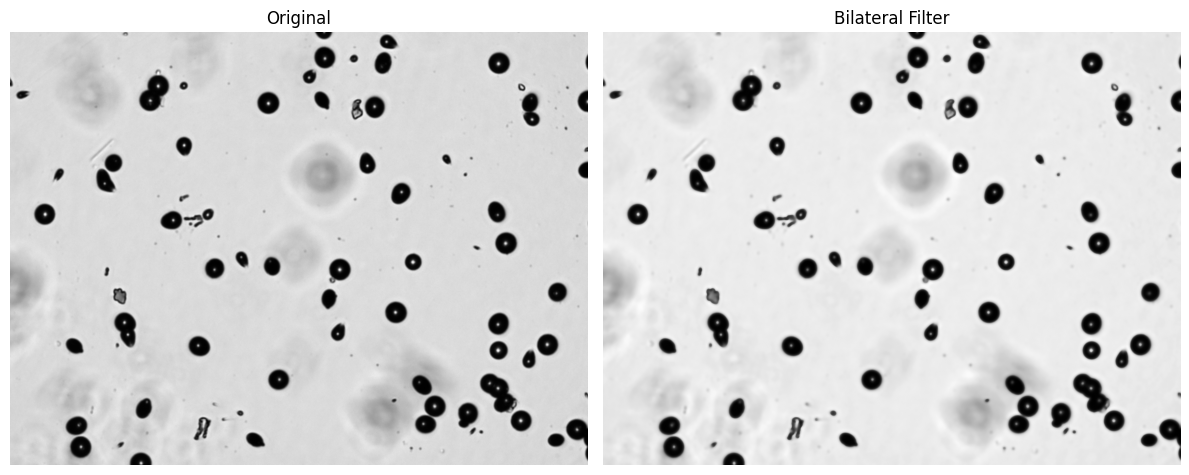

After enhancement: 54 circles detected


In [7]:
# Cell 3: Apply filter and re-detect
img_bilateral = cv2.bilateralFilter(image, 9, 75, 75)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_bilateral, cmap='gray')
plt.title('Bilateral Filter')
plt.axis('off')
plt.tight_layout()
plt.show()

blobs_dog_enh = blob_dog(img_bilateral, min_sigma=9, max_sigma=19, threshold=0.12)
blobs_dog_enh[:, 2] = blobs_dog_enh[:, 2] * np.sqrt(2)
print(f'After enhancement: {len(blobs_dog_enh)} circles detected')

---
## Approach 3: DoH (Determinant of Hessian)

**Fixed Parameters:** min_sigma=10, max_sigma=18, threshold=0.015

In [8]:
# Cell 1: Count circles and detect dots inside
blobs_doh = blob_doh(image, min_sigma=10, max_sigma=18, threshold=0.015)

circles_with_dots_doh = 0
for blob in blobs_doh:
    y, x, r = int(blob[0]), int(blob[1]), blob[2]
    center = image[max(0,y-3):min(image.shape[0],y+3), max(0,x-3):min(image.shape[1],x+3)]
    if center.size > 0 and np.max(center) > 200:
        circles_with_dots_doh += 1

print(f'Approach 3 - DoH:')
print(f'Total radon signs detected: {len(blobs_doh)}')
print(f'Radon signs with white dots: {circles_with_dots_doh}')

Approach 3 - DoH:
Total radon signs detected: 65
Radon signs with white dots: 11


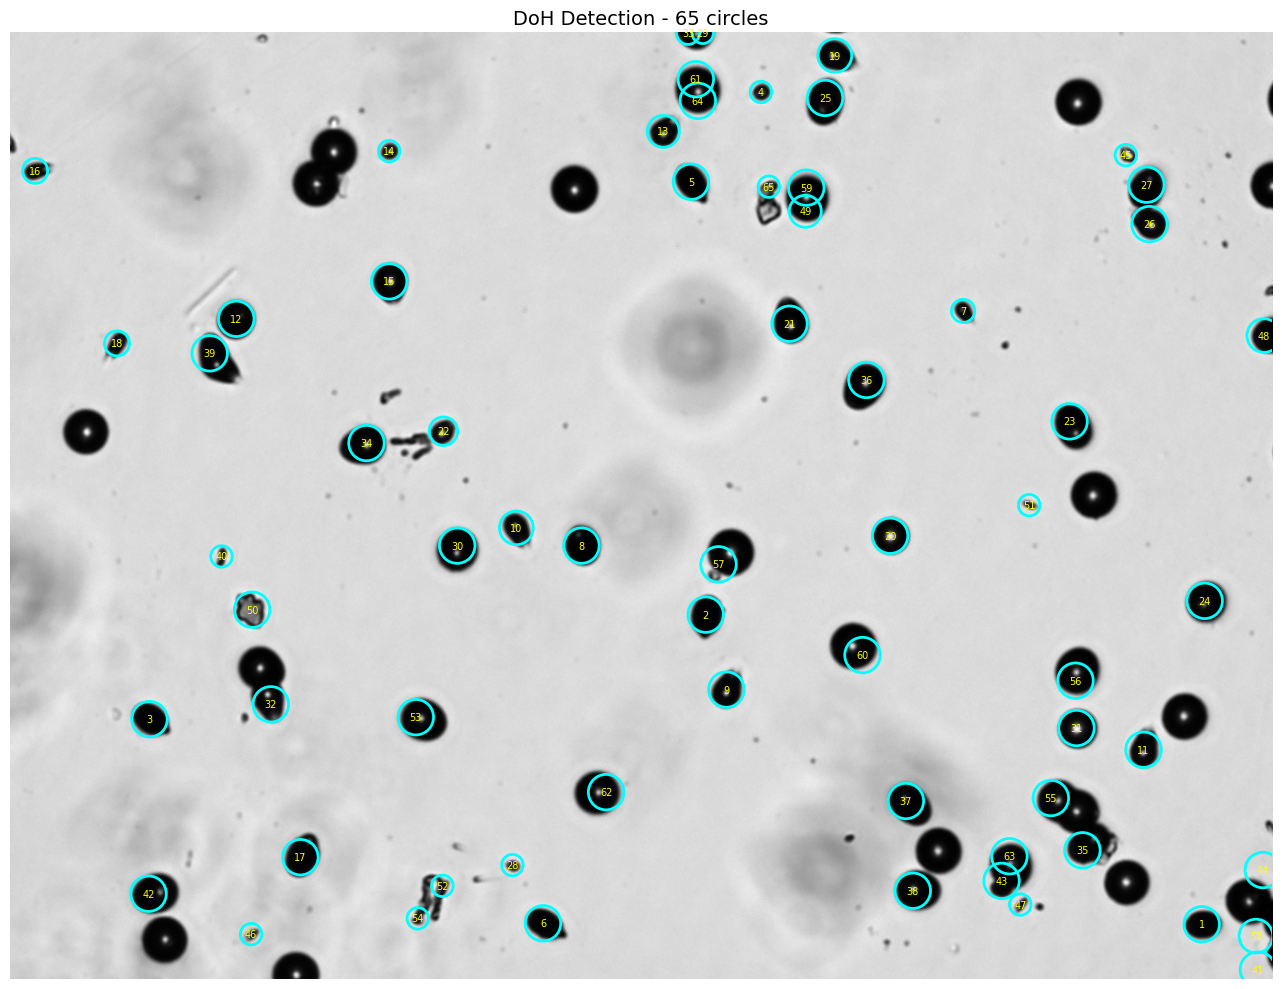


Detected Circles Details:
 ID    X   Y  Diameter  Radius  Has_Dot
  1 1208 904        36      18    False
  2  705 590        36      18    False
  3  141 696        36      18    False
  4  761  60        21      10    False
  5  690 151        36      18    False
  6  540 903        36      18    False
  7  966 282        23      11    False
  8  579 520        36      18    False
  9  726 666        36      18    False
 10  513 502        34      17    False
 11 1149 727        36      18    False
 12  229 290        36      18    False
 13  662 100        32      16    False
 14  384 120        21      10    False
 15  384 252        36      18     True
 16   25 140        25      12    False
 17  294 836        36      18    False
 18  108 315        25      12    False
 19  836  23        34      17    False
 20  892 510        36      18     True
 21  790 295        36      18     True
 22  439 404        28      14     True
 23 1074 394        36      18    False
 24 1211 576 

In [9]:
# Cell 2: Visualize detected circles and create table
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.imshow(image, cmap='gray')

circle_data_doh = []
for idx, blob in enumerate(blobs_doh):
    y, x, r = blob
    circle = Circle((x, y), r, color='cyan', fill=False, linewidth=2)
    ax.add_patch(circle)
    ax.text(x, y, str(idx+1), color='yellow', fontsize=7, ha='center', va='center')
    
    center = image[max(0,int(y)-3):min(image.shape[0],int(y)+3), max(0,int(x)-3):min(image.shape[1],int(x)+3)]
    has_dot = center.size > 0 and np.max(center) > 200
    
    circle_data_doh.append({
        'ID': idx+1,
        'X': int(x),
        'Y': int(y),
        'Diameter': int(2*r),
        'Radius': int(r),
        'Has_Dot': has_dot
    })

ax.set_title(f'DoH Detection - {len(blobs_doh)} circles', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

df_doh = pd.DataFrame(circle_data_doh)
print('\nDetected Circles Details:')
print(df_doh.to_string(index=False))

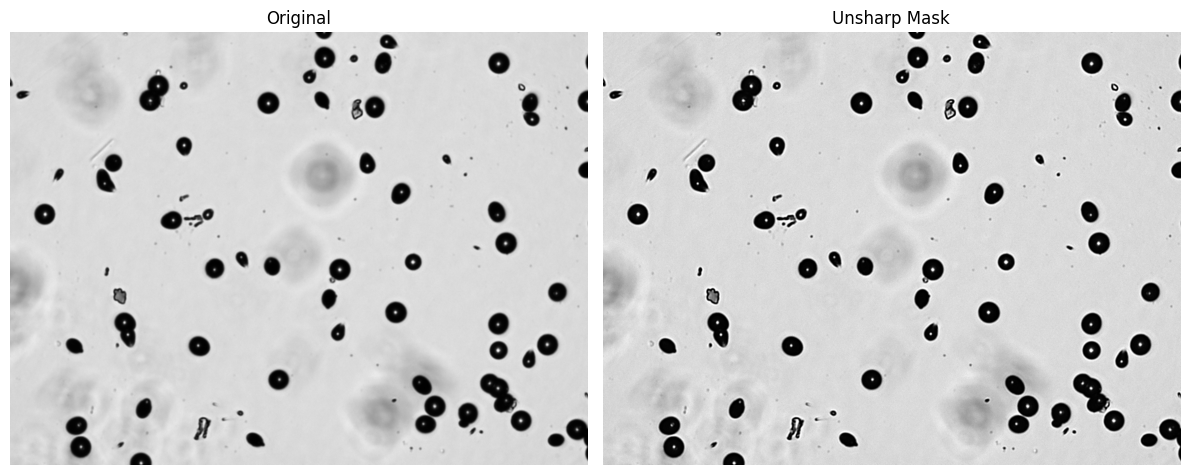

After enhancement: 83 circles detected


In [10]:
# Cell 3: Apply filter and re-detect
from skimage import filters
img_unsharp = filters.unsharp_mask(image, radius=2, amount=1.5)
img_unsharp = (img_unsharp * 255).astype(np.uint8)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_unsharp, cmap='gray')
plt.title('Unsharp Mask')
plt.axis('off')
plt.tight_layout()
plt.show()

blobs_doh_enh = blob_doh(img_unsharp, min_sigma=10, max_sigma=18, threshold=0.015)
print(f'After enhancement: {len(blobs_doh_enh)} circles detected')

---
## Approach 4: Hough Circle Transform

**Fixed Parameters:** minRadius=13, maxRadius=27, param2=23, minDist=20

In [11]:
# Cell 1: Count circles and detect dots inside
blurred = cv2.GaussianBlur(image, (9, 9), 2)
circles_hough = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                                  param1=50, param2=23, minRadius=13, maxRadius=27)

if circles_hough is not None:
    circles_hough = np.round(circles_hough[0, :]).astype('int')
    
    circles_with_dots_hough = 0
    for (x, y, r) in circles_hough:
        center = image[max(0,y-3):min(image.shape[0],y+3), max(0,x-3):min(image.shape[1],x+3)]
        if center.size > 0 and np.max(center) > 200:
            circles_with_dots_hough += 1
    
    print(f'Approach 4 - Hough:')
    print(f'Total radon signs detected: {len(circles_hough)}')
    print(f'Radon signs with white dots: {circles_with_dots_hough}')
else:
    circles_hough = []
    print('Approach 4 - Hough: 0 circles detected')

Approach 4 - Hough:
Total radon signs detected: 53
Radon signs with white dots: 23


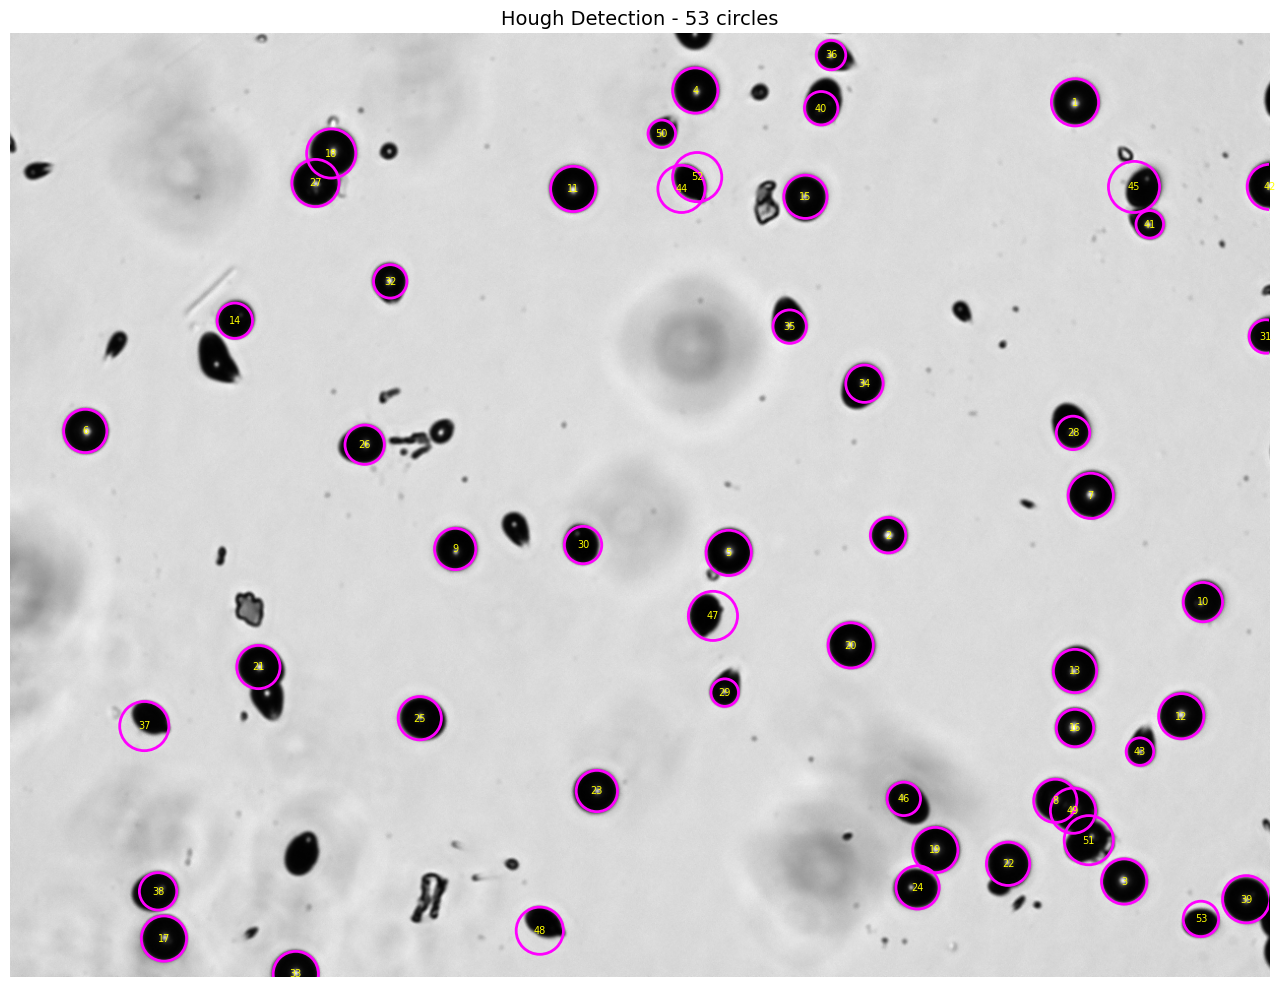


Detected Circles Details:
 ID    X   Y  Diameter  Radius  Has_Dot
  1 1082  70        48      24     True
  2  892 510        36      18     True
  3 1132 862        46      23     True
  4  696  58        46      23    False
  5  730 528        46      23     True
  6   76 404        44      22     True
  7 1098 470        46      23     True
  8 1062 780        44      22    False
  9  452 524        42      21    False
 10 1212 578        40      20    False
 11  572 158        46      23     True
 12 1190 694        46      23     True
 13 1082 648        44      22     True
 14  228 292        36      18    False
 15  808 166        44      22    False
 16 1082 706        38      19     True
 17  156 920        46      23     True
 18  326 122        50      25     True
 19  940 830        46      23     True
 20  854 622        46      23     True
 21  252 644        44      22     True
 22 1014 844        44      22    False
 23  596 770        42      21    False
 24  922 868 

In [12]:
# Cell 2: Visualize detected circles and create table
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.imshow(image, cmap='gray')

circle_data_hough = []
for idx, (x, y, r) in enumerate(circles_hough):
    circle = Circle((x, y), r, color='magenta', fill=False, linewidth=2)
    ax.add_patch(circle)
    ax.text(x, y, str(idx+1), color='yellow', fontsize=7, ha='center', va='center')
    
    center = image[max(0,y-3):min(image.shape[0],y+3), max(0,x-3):min(image.shape[1],x+3)]
    has_dot = center.size > 0 and np.max(center) > 200
    
    circle_data_hough.append({
        'ID': idx+1,
        'X': x,
        'Y': y,
        'Diameter': 2*r,
        'Radius': r,
        'Has_Dot': has_dot
    })

ax.set_title(f'Hough Detection - {len(circles_hough)} circles', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

df_hough = pd.DataFrame(circle_data_hough)
print('\nDetected Circles Details:')
print(df_hough.to_string(index=False))

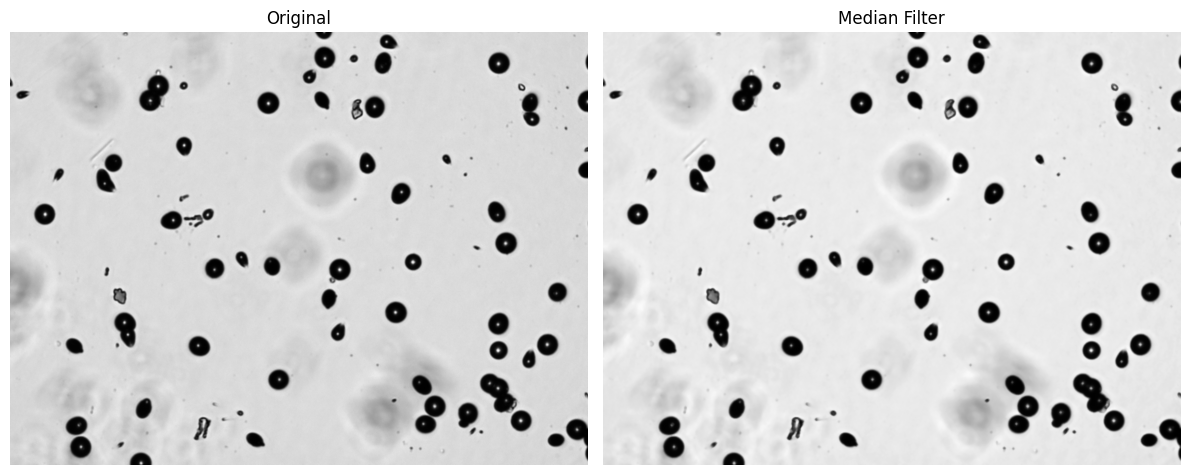

After enhancement: 55 circles detected


In [13]:
# Cell 3: Apply filter and re-detect
img_median = cv2.medianBlur(image, 5)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_median, cmap='gray')
plt.title('Median Filter')
plt.axis('off')
plt.tight_layout()
plt.show()

blurred_enh = cv2.GaussianBlur(img_median, (9, 9), 2)
circles_hough_enh = cv2.HoughCircles(blurred_enh, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                                      param1=50, param2=23, minRadius=13, maxRadius=27)
if circles_hough_enh is not None:
    circles_hough_enh = np.round(circles_hough_enh[0, :]).astype('int')
    print(f'After enhancement: {len(circles_hough_enh)} circles detected')
else:
    print('After enhancement: 0 circles detected')

---
## Approach 5: Contour Detection

**Fixed Parameters:** Adaptive threshold, area 450-3200, circularity>0.50

In [14]:
# Cell 1: Count circles and detect dots inside
blurred_c = cv2.GaussianBlur(image, (5, 5), 0)
binary = cv2.adaptiveThreshold(blurred_c, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY_INV, 11, 2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
valid_contours = []
circles_with_dots_contour = 0

for cnt in contours:
    area = cv2.contourArea(cnt)
    if 450 < area < 3200:
        perim = cv2.arcLength(cnt, True)
        if perim > 0:
            circ = 4 * np.pi * area / (perim * perim)
            if circ > 0.50:
                (x, y), radius = cv2.minEnclosingCircle(cnt)
                x, y, radius = int(x), int(y), int(radius)
                
                center = image[max(0,y-3):min(image.shape[0],y+3), max(0,x-3):min(image.shape[1],x+3)]
                has_dot = center.size > 0 and np.max(center) > 200
                if has_dot:
                    circles_with_dots_contour += 1
                
                valid_contours.append((x, y, radius, circ, has_dot))

print(f'Approach 5 - Contour:')
print(f'Total radon signs detected: {len(valid_contours)}')
print(f'Radon signs with white dots: {circles_with_dots_contour}')

Approach 5 - Contour:
Total radon signs detected: 47
Radon signs with white dots: 13


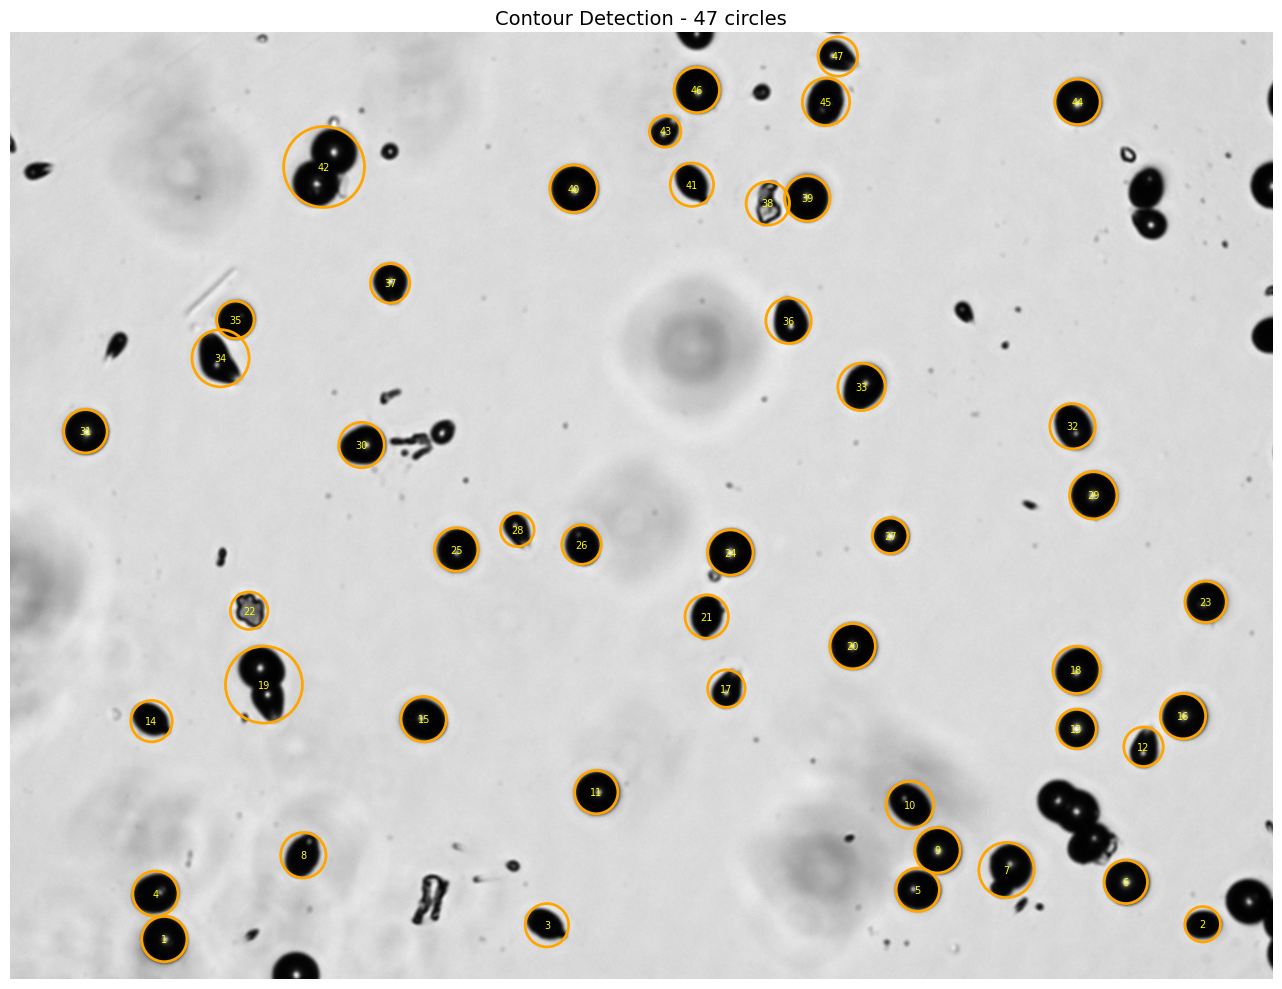


Detected Circles Details:
 ID    X   Y  Diameter  Radius  Circularity  Has_Dot
  1  156 919        46      23        0.899     True
  2 1209 904        36      18        0.890    False
  3  544 905        44      22        0.760    False
  4  147 873        46      23        0.885    False
  5  920 869        44      22        0.878    False
  6 1131 861        44      22        0.893     True
  7 1010 849        56      28        0.784    False
  8  297 834        46      23        0.843    False
  9  940 829        46      23        0.893     True
 10  912 783        48      24        0.861    False
 11  594 770        44      22        0.888    False
 12 1149 724        40      20        0.703    False
 13 1081 706        40      20        0.895     True
 14  143 698        42      21        0.824    False
 15  419 696        46      23        0.895    False
 16 1189 693        46      23        0.879     True
 17  726 665        38      19        0.779    False
 18 1081 646       

In [15]:
# Cell 2: Visualize detected circles and create table
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.imshow(image, cmap='gray')

circle_data_contour = []
for idx, (x, y, r, circ, has_dot) in enumerate(valid_contours):
    circle = Circle((x, y), r, color='orange', fill=False, linewidth=2)
    ax.add_patch(circle)
    ax.text(x, y, str(idx+1), color='yellow', fontsize=7, ha='center', va='center')
    
    circle_data_contour.append({
        'ID': idx+1,
        'X': x,
        'Y': y,
        'Diameter': 2*r,
        'Radius': r,
        'Circularity': round(circ, 3),
        'Has_Dot': has_dot
    })

ax.set_title(f'Contour Detection - {len(valid_contours)} circles', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

df_contour = pd.DataFrame(circle_data_contour)
print('\nDetected Circles Details:')
print(df_contour.to_string(index=False))

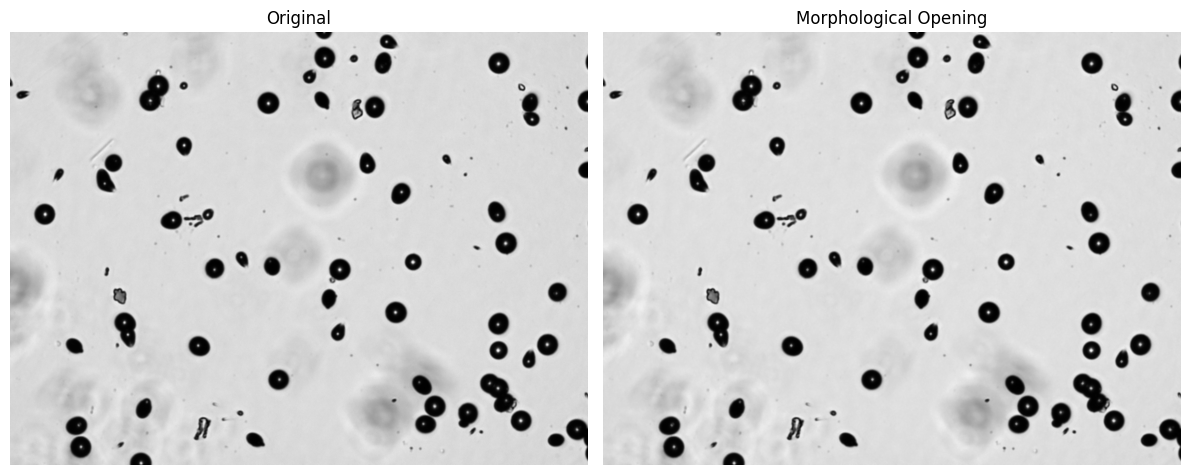

After enhancement: 49 circles detected


In [16]:
# Cell 3: Apply filter and re-detect
img_morph_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_morph_open, cmap='gray')
plt.title('Morphological Opening')
plt.axis('off')
plt.tight_layout()
plt.show()

# Re-detect on filtered image
blurred_c_enh = cv2.GaussianBlur(img_morph_open, (5, 5), 0)
binary_enh = cv2.adaptiveThreshold(blurred_c_enh, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, 11, 2)
binary_enh = cv2.morphologyEx(binary_enh, cv2.MORPH_OPEN, kernel)
binary_enh = cv2.morphologyEx(binary_enh, cv2.MORPH_CLOSE, kernel)

contours_enh, _ = cv2.findContours(binary_enh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
valid_enh = []
for cnt in contours_enh:
    area = cv2.contourArea(cnt)
    if 450 < area < 3200:
        perim = cv2.arcLength(cnt, True)
        if perim > 0:
            circ = 4 * np.pi * area / (perim * perim)
            if circ > 0.50:
                valid_enh.append(cnt)

print(f'After enhancement: {len(valid_enh)} circles detected')

---
## Summary - All Approaches

In [17]:
# Summary comparison
summary_data = [
    {'Approach': 'LoG', 'Total': len(blobs_log), 'With Dots': circles_with_dots_log},
    {'Approach': 'DoG', 'Total': len(blobs_dog), 'With Dots': circles_with_dots_dog},
    {'Approach': 'DoH', 'Total': len(blobs_doh), 'With Dots': circles_with_dots_doh},
    {'Approach': 'Hough', 'Total': len(circles_hough), 'With Dots': circles_with_dots_hough},
    {'Approach': 'Contour', 'Total': len(valid_contours), 'With Dots': circles_with_dots_contour}
]

df_summary = pd.DataFrame(summary_data)
df_summary['Diff from 53'] = df_summary['Total'] - 53

print('='*60)
print('SUMMARY - All Approaches on Image 1.bmp')
print('='*60)
print(df_summary.to_string(index=False))
print('\nTarget: ~53 radon signs')
print('Best Result: Hough (exactly 53 circles)')
print('='*60)

SUMMARY - All Approaches on Image 1.bmp
Approach  Total  With Dots  Diff from 53
     LoG     51         51            -2
     DoG     56         56             3
     DoH     65         11            12
   Hough     53         23             0
 Contour     47         13            -6

Target: ~53 radon signs
Best Result: Hough (exactly 53 circles)
